In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset
from functions.class_weights import calculate_class_weight
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top'

In [3]:
BATCH_SIZE = 64
dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
class_weight = calculate_class_weight(dataset, .6)

Found 8015 files belonging to 7 classes.


In [4]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

In [5]:
train_ds_dir = os.path.join(DATA_DIR, 'training')
class_dirs = [
    os.path.join(train_ds_dir, class_dir)
    for class_dir in os.listdir(train_ds_dir)
    if os.path.isdir(os.path.join(train_ds_dir, class_dir))]
class_counts = [len(os.listdir(class_dir)) for class_dir in class_dirs]
total_samples = np.sum(class_counts)
initial_biases = np.log(class_counts / (total_samples - class_counts))

Found 2000 files belonging to 7 classes.
Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 3.5198 - categorical cross entropy: 0.9430 - mean squared error: 0.0607 - accuracy: 0.6898 - auc: 0.7754 - prc: 0.2562

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_1\assets


126/126 [==============================] - 131s 872ms/step - loss: 3.5198 - categorical cross entropy: 0.9430 - mean squared error: 0.0607 - accuracy: 0.6898 - auc: 0.7754 - prc: 0.2562 - val_loss: 1.2223 - val_categorical cross entropy: 1.2223 - val_mean squared error: 0.0796 - val_accuracy: 0.6725 - val_auc: 0.5839 - val_prc: 0.2112 - lr: 0.0010
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 3.0129 - categorical cross entropy: 0.8284 - mean squared error: 0.0554 - accuracy: 0.7036 - auc: 0.8606 - prc: 0.3586

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_2\assets


126/126 [==============================] - 109s 864ms/step - loss: 3.0129 - categorical cross entropy: 0.8284 - mean squared error: 0.0554 - accuracy: 0.7036 - auc: 0.8606 - prc: 0.3586 - val_loss: 1.1554 - val_categorical cross entropy: 1.1554 - val_mean squared error: 0.0727 - val_accuracy: 0.6680 - val_auc: 0.7549 - val_prc: 0.3472 - lr: 0.0010
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 2.7947 - categorical cross entropy: 0.7721 - mean squared error: 0.0530 - accuracy: 0.7224 - auc: 0.8835 - prc: 0.4190

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_3\assets


126/126 [==============================] - 111s 884ms/step - loss: 2.7947 - categorical cross entropy: 0.7721 - mean squared error: 0.0530 - accuracy: 0.7224 - auc: 0.8835 - prc: 0.4190 - val_loss: 0.8206 - val_categorical cross entropy: 0.8206 - val_mean squared error: 0.0549 - val_accuracy: 0.7185 - val_auc: 0.8677 - val_prc: 0.4629 - lr: 0.0010
Epoch 4/100
126/126 [==============================] - ETA: 0s - loss: 2.6375 - categorical cross entropy: 0.7284 - mean squared error: 0.0507 - accuracy: 0.7415 - auc: 0.8945 - prc: 0.4530

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_4\assets


126/126 [==============================] - 112s 889ms/step - loss: 2.6375 - categorical cross entropy: 0.7284 - mean squared error: 0.0507 - accuracy: 0.7415 - auc: 0.8945 - prc: 0.4530 - val_loss: 0.7495 - val_categorical cross entropy: 0.7495 - val_mean squared error: 0.0529 - val_accuracy: 0.7135 - val_auc: 0.8955 - val_prc: 0.4236 - lr: 0.0010
Epoch 5/100
126/126 [==============================] - ETA: 0s - loss: 2.5475 - categorical cross entropy: 0.7061 - mean squared error: 0.0497 - accuracy: 0.7394 - auc: 0.9043 - prc: 0.4749

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_5\assets


126/126 [==============================] - 113s 898ms/step - loss: 2.5475 - categorical cross entropy: 0.7061 - mean squared error: 0.0497 - accuracy: 0.7394 - auc: 0.9043 - prc: 0.4749 - val_loss: 0.7009 - val_categorical cross entropy: 0.7009 - val_mean squared error: 0.0491 - val_accuracy: 0.7485 - val_auc: 0.8865 - val_prc: 0.5149 - lr: 0.0010
Epoch 6/100
126/126 [==============================] - ETA: 0s - loss: 2.4451 - categorical cross entropy: 0.6838 - mean squared error: 0.0483 - accuracy: 0.7525 - auc: 0.9101 - prc: 0.5167

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_6\assets


126/126 [==============================] - 113s 896ms/step - loss: 2.4451 - categorical cross entropy: 0.6838 - mean squared error: 0.0483 - accuracy: 0.7525 - auc: 0.9101 - prc: 0.5167 - val_loss: 0.6924 - val_categorical cross entropy: 0.6924 - val_mean squared error: 0.0477 - val_accuracy: 0.7575 - val_auc: 0.9069 - val_prc: 0.5502 - lr: 0.0010
Epoch 7/100
126/126 [==============================] - 59s 467ms/step - loss: 2.3767 - categorical cross entropy: 0.6655 - mean squared error: 0.0473 - accuracy: 0.7560 - auc: 0.9181 - prc: 0.5347 - val_loss: 0.7235 - val_categorical cross entropy: 0.7235 - val_mean squared error: 0.0505 - val_accuracy: 0.7390 - val_auc: 0.9098 - val_prc: 0.5556 - lr: 0.0010
Epoch 8/100
126/126 [==============================] - 59s 466ms/step - loss: 2.3359 - categorical cross entropy: 0.6589 - mean squared error: 0.0469 - accuracy: 0.7572 - auc: 0.9213 - prc: 0.5457 - val_loss: 0.7137 - val_categorical cross entropy: 0.7137 - val_mean squared error: 0.0492 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_11\assets


126/126 [==============================] - 115s 913ms/step - loss: 2.2067 - categorical cross entropy: 0.6267 - mean squared error: 0.0451 - accuracy: 0.7703 - auc: 0.9300 - prc: 0.5892 - val_loss: 0.6706 - val_categorical cross entropy: 0.6706 - val_mean squared error: 0.0476 - val_accuracy: 0.7600 - val_auc: 0.9036 - val_prc: 0.5718 - lr: 0.0010
Epoch 12/100
126/126 [==============================] - 62s 489ms/step - loss: 2.1049 - categorical cross entropy: 0.5973 - mean squared error: 0.0429 - accuracy: 0.7843 - auc: 0.9357 - prc: 0.6329 - val_loss: 0.7102 - val_categorical cross entropy: 0.7102 - val_mean squared error: 0.0494 - val_accuracy: 0.7455 - val_auc: 0.9047 - val_prc: 0.5810 - lr: 0.0010
Epoch 13/100
126/126 [==============================] - ETA: 0s - loss: 2.0619 - categorical cross entropy: 0.5868 - mean squared error: 0.0425 - accuracy: 0.7854 - auc: 0.9382 - prc: 0.6456

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_13\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_13\assets


126/126 [==============================] - 118s 939ms/step - loss: 2.0619 - categorical cross entropy: 0.5868 - mean squared error: 0.0425 - accuracy: 0.7854 - auc: 0.9382 - prc: 0.6456 - val_loss: 0.6527 - val_categorical cross entropy: 0.6527 - val_mean squared error: 0.0462 - val_accuracy: 0.7715 - val_auc: 0.9151 - val_prc: 0.5986 - lr: 0.0010
Epoch 14/100
126/126 [==============================] - ETA: 0s - loss: 2.0293 - categorical cross entropy: 0.5815 - mean squared error: 0.0421 - accuracy: 0.7888 - auc: 0.9390 - prc: 0.6539

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_14\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_14\assets


126/126 [==============================] - 115s 914ms/step - loss: 2.0293 - categorical cross entropy: 0.5815 - mean squared error: 0.0421 - accuracy: 0.7888 - auc: 0.9390 - prc: 0.6539 - val_loss: 0.6192 - val_categorical cross entropy: 0.6192 - val_mean squared error: 0.0434 - val_accuracy: 0.7885 - val_auc: 0.9167 - val_prc: 0.6030 - lr: 0.0010
Epoch 15/100
126/126 [==============================] - ETA: 0s - loss: 1.9786 - categorical cross entropy: 0.5634 - mean squared error: 0.0411 - accuracy: 0.7943 - auc: 0.9433 - prc: 0.6672

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_15\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_15\assets


126/126 [==============================] - 117s 931ms/step - loss: 1.9786 - categorical cross entropy: 0.5634 - mean squared error: 0.0411 - accuracy: 0.7943 - auc: 0.9433 - prc: 0.6672 - val_loss: 0.6073 - val_categorical cross entropy: 0.6073 - val_mean squared error: 0.0423 - val_accuracy: 0.7870 - val_auc: 0.9175 - val_prc: 0.6575 - lr: 0.0010
Epoch 16/100
126/126 [==============================] - ETA: 0s - loss: 1.9291 - categorical cross entropy: 0.5545 - mean squared error: 0.0402 - accuracy: 0.8005 - auc: 0.9451 - prc: 0.6838

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_16\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_10_class_weight_and_bias_whole_model_trainable_with_attention_module_on_top_20_16\assets


126/126 [==============================] - 117s 930ms/step - loss: 1.9291 - categorical cross entropy: 0.5545 - mean squared error: 0.0402 - accuracy: 0.8005 - auc: 0.9451 - prc: 0.6838 - val_loss: 0.5913 - val_categorical cross entropy: 0.5913 - val_mean squared error: 0.0426 - val_accuracy: 0.7890 - val_auc: 0.9299 - val_prc: 0.6411 - lr: 0.0010
Epoch 17/100
126/126 [==============================] - 61s 484ms/step - loss: 1.8869 - categorical cross entropy: 0.5430 - mean squared error: 0.0398 - accuracy: 0.7986 - auc: 0.9457 - prc: 0.6987 - val_loss: 0.6857 - val_categorical cross entropy: 0.6857 - val_mean squared error: 0.0484 - val_accuracy: 0.7480 - val_auc: 0.9215 - val_prc: 0.5935 - lr: 0.0010
Epoch 18/100
126/126 [==============================] - 61s 486ms/step - loss: 1.8737 - categorical cross entropy: 0.5396 - mean squared error: 0.0394 - accuracy: 0.8029 - auc: 0.9462 - prc: 0.7078 - val_loss: 0.6957 - val_categorical cross entropy: 0.6957 - val_mean squared error: 0.048

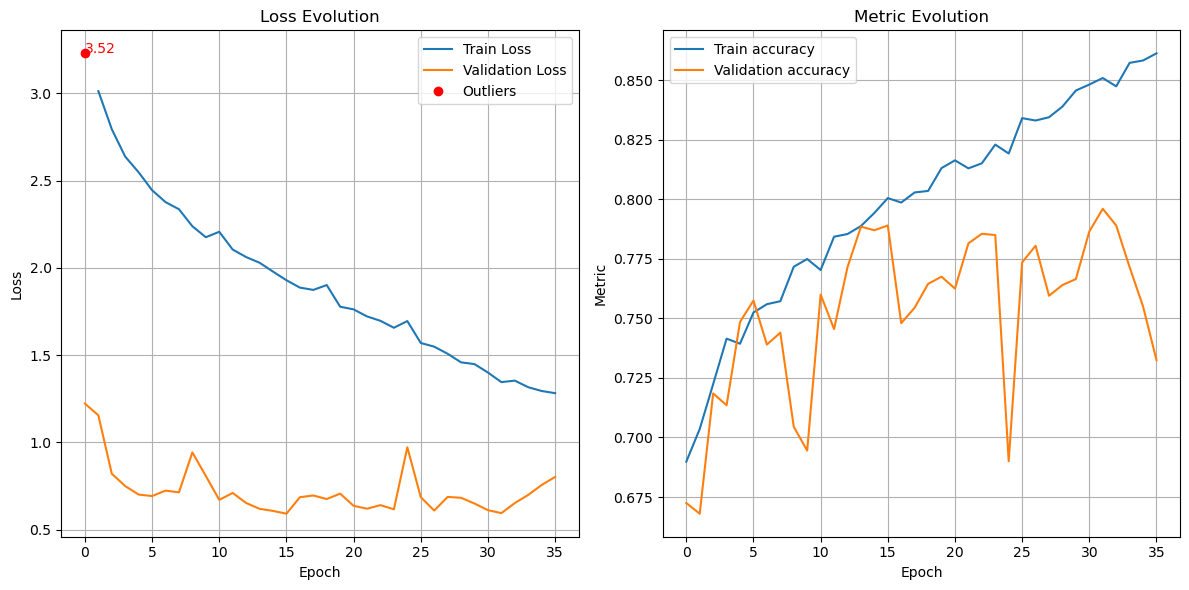

In [6]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_model_with_attention(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS,
            biases=keras.initializers.Constant(initial_biases)),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=dataset,
    class_weight=class_weight,
    stopping_patience=20)